# Análise Exploratória com Pandas
## Estudando as empresas Listadas na bolsa de Valores B3

Dados extraídos do portal [Fundamentus](https://www.fundamentus.com.br/resultado.php) no dia 01/02/2024

In [36]:
import pandas as pd
import pprint
import seaborn as  sns
import matplotlib.pyplot as plt
import re
from unicodedata import normalize

pd.set_option('display.max_columns', None)

In [37]:
# helpers

def format_column_names(text):


    
    string_step1 = text.replace(".", "_")
    
    string_step2 = string_step1.replace(' ', "_")
    
    string_step3 = string_step2.replace('/', '_')

    string_step4 = string_step3.replace('__', '_')

    if '_' == string_step4[-1]:

        return normalize('NFKD', string_step4[:-1]).encode('ASCII', 'ignore').decode('ASCII')
    
    else:

        return normalize('NFKD', string_step4).encode('ASCII', 'ignore').decode('ASCII')



## ATIVIDADE 1

In [38]:
#Leirura do arquivo

data = pd.read_csv("./dados/empresas_bolsas.csv", sep=";")


In [39]:
# 7 primeiras linhas do dataset

data.head(7)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
0,AALR3,"8,45","-3,8","0,98","0,866","0,00%","0,364","-4,47","46,85","-0,92","82,32","12,7","1,85%","-22,10%","0,74","0,91%","-25,92%",1386260,1015110000,"1,04","3,54%","5,47",999576000
1,ABCB3,0,0,0,0,"0,00%",0,0,0,0,0,0,"0,00%","0,00%",0,"0,00%","14,29%",0,5721810000,0,"70,94%",NaN,0
2,ABCB4,"23,85","6,91","0,99",0,"6,31%",0,0,0,0,0,0,"0,00%","0,00%",0,"0,00%","14,29%",13961000,5721810000,0,"70,94%",NaN,5650930000
3,ABEV3,"13,08","13,66","2,28","2,5","5,58%","1,494","55,59","12,12","-23,42","11,3","8,32","20,63%","18,82%","1,11","16,50%","16,71%",280700000,90254900000,"0,04","13,23%","-0,6",206060000000
4,ABYA3,"4,91","-214,8","1,76","2,055","0,00%","0,527","1,98","19,96","-2,75","33,67","33,67","10,29%","-0,96%","2,09","2,78%","-0,82%",0,292060000,"1,31","16,41%","13,7",515088000
5,ACES3,"95,27","8,79","2,28","1,693","0,00%","1,438","6,4","7,2","20,77","6,54","6,54","23,52%","19,27%","2,05","26,90%","25,95%",0,3105800000,"0,09","13,34%","-0,65",7080470000
6,ACES4,"94,73","8,74","2,27","1,683","0,00%","1,43","6,37","7,16","20,65","6,5","6,5","23,52%","19,27%","2,05","26,90%","25,95%",0,3105800000,"0,09","13,34%","-0,65",7040330000


In [40]:
# 5 últimas linhas do dataset

data.tail(5)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
981,WLMM4,27,"9,31","1,47","0,465","3,32%","1,191","2,72","7,7","3,19","6,99","6,75","6,03%","4,99%","4,54","18,34%","15,77%",17755,669898000,"0,01","22,65%","-0,69",983196000
982,WMBY3,"25,39","-19,3","2,87","0,836","0,00%","0,182","1,2","8,62","-1,5","25,02","25,02","9,70%","-7,05%","1,44","2,39%","-14,86%",0,212439000,"6,51","-14,48%","16,4",609360000
983,WSON33,67,"8,07","0,98","1,067","0,00%","0,4","13,41","2,42","-0,89","5,08","5,08","44,14%","13,58%","1,26","18,36%","12,17%",0,2148530000,"1,21","5,23%","2,66",2110500000
984,YDUQ3,"19,28","31,69","1,84","1,187","1,43%","0,608","6,84","7,33","-1,5","12,45","6,42","16,20%","3,80%","1,52","9,69%","5,81%",65311100,3239030000,"1,65","8,98%","2,64",5959240000
985,ZAMP3,"4,98","-11,91","1,03","0,359","0,00%","0,344","51,55","14,42","-0,76","22,4","4,05","2,49%","-3,02%","1,03","2,86%","-8,65%",10630400,1331470000,"0,87","11,28%","1,44",1371270000


In [41]:
# Estrutura do DataFrame

linhas = data.shape[0]
colunas = data.shape[1]
print(f"O DataFrame Possui {linhas} linhas e {colunas} colunas")

O DataFrame Possui 986 linhas e 23 colunas


In [42]:
# Explorando as colunas do DataFrame

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PAPEL                  986 non-null    object
 1   COTAÇÃO                986 non-null    object
 2   P/L                    986 non-null    object
 3   P/VP                   986 non-null    object
 4   PSR                    986 non-null    object
 5   DIV.YIELD              986 non-null    object
 6   P/ATIVO                986 non-null    object
 7   P/CAP.GIRO             986 non-null    object
 8   P/EBIT                 986 non-null    object
 9   P/ATIV CIRC.LIQ        986 non-null    object
 10  EV/EBIT                986 non-null    object
 11  EV/EBITDA              986 non-null    object
 12  MRG EBIT               986 non-null    object
 13  MRG. LÍQ.              986 non-null    object
 14  LIQ. CORR.             986 non-null    object
 15  ROIC                   

In [43]:
# Identificando as colunas do DataFrame

pp = pprint.PrettyPrinter(indent=4)
colunas_Df = data.columns
pp.pprint(list(colunas_Df))

columns_exclude = [
    'PAPEL',
    'DIV.YIELD',
    'MRG EBIT',
    'MRG. LÍQ.',
    'ROIC',
    'ROE',
    'CRESC. REC.5A',
]

numerical_columns = list(data.columns)

for i in columns_exclude:
    numerical_columns.remove(i)

percentual_number_columns = [
    'DIV.YIELD',
    'MRG EBIT',
    'MRG. LÍQ.',
    'ROIC',
    'ROE',
    'CRESC. REC.5A'
]

[   'PAPEL',
    'COTAÇÃO',
    'P/L',
    'P/VP',
    'PSR',
    'DIV.YIELD',
    'P/ATIVO',
    'P/CAP.GIRO',
    'P/EBIT',
    'P/ATIV CIRC.LIQ',
    'EV/EBIT',
    'EV/EBITDA',
    'MRG EBIT',
    'MRG. LÍQ.',
    'LIQ. CORR.',
    'ROIC',
    'ROE',
    'LIQ.2MESES',
    'PATRIM. LÍQ',
    'DÍV.LÍQ/ PATRIM.',
    'CRESC. REC.5A',
    'DÍVIDA LÍQUIDA/EBITDA',
    'VALOR DE MERCADO']


In [44]:
# transformando os valores percentuais para float

for i in percentual_number_columns:
    data[i] = data[i].str[:-1]
    data[i] = data[i].str.replace(',', '.')

    for j in range(len(data[i])):
        list_index = []
        value = data[i][j]

        for index in range(len(value)):
            if value[index] == '.':
                list_index.append(index)

        new_value = value[:list_index[-1]].replace('.', '') + value[list_index[-1]:]

        #data[i][j] = new_value
        data.loc[j, i] = new_value
        #print(new_value)
        #data[i].replace(j, new_value, inplace=True)
        #data.replace({i:{j:new_value}}, inplace=True) 
        #data[i] = data[i].replace(j, new_value)     
        #print(data[i][j])

for i in percentual_number_columns:
    data[i] = data[i].astype('float')
    data[i] = data[i]*0.01

In [45]:
# transformando os dados numéricos em formato de String para tipo Float

for i in numerical_columns:
    if data[i].dtype == 'object':
        data[i] = data[i].str.replace(',', '.')
        data[i] = data[i].astype('float')

In [46]:
data.head(10)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
0,AALR3,8.45,-3.80,0.98,0.866,0.0000,0.364,-4.47,46.85,-0.92,82.32,12.70,0.0185,-0.2210,0.74,0.0091,-0.2592,1386260,1015110000,1.04,0.0354,5.47,999576000
1,ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,0,5721810000,0.00,0.7094,NaN,0
2,ABCB4,23.85,6.91,0.99,0.000,0.0631,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,13961000,5721810000,0.00,0.7094,NaN,5650930000
3,ABEV3,13.08,13.66,2.28,2.500,0.0558,1.494,55.59,12.12,-23.42,11.30,8.32,0.2063,0.1882,1.11,0.1650,0.1671,280700000,90254900000,0.04,0.1323,-0.60,206060000000
4,ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0,292060000,1.31,0.1641,13.70,515088000
5,ACES3,95.27,8.79,2.28,1.693,0.0000,1.438,6.40,7.20,20.77,6.54,6.54,0.2352,0.1927,2.05,0.2690,0.2595,0,3105800000,0.09,0.1334,-0.65,7080470000
6,ACES4,94.73,8.74,2.27,1.683,0.0000,1.430,6.37,7.16,20.65,6.50,6.50,0.2352,0.1927,2.05,0.2690,0.2595,0,3105800000,0.09,0.1334,-0.65,7040330000
7,ADHM3,1.56,-4.09,-1.29,770.924,0.0000,105.126,-1.43,-5.69,-1.27,-5.69,-5.81,-135.4850,-188.6060,0.00,5.2170,0.3147,2064,-19776000,0.00,0.4348,0.00,25440500
8,AEDU3,18.35,59.34,3.32,4.141,0.0000,2.159,17.00,41.06,-21.55,43.27,29.01,0.1008,0.0698,2.04,0.0577,0.0560,0,2415400000,0.30,0.2090,1.48,8020250000
9,AEDU11,37.35,20.13,1.13,1.405,0.0000,0.732,5.77,13.93,-7.31,16.14,10.82,0.1008,0.0698,2.04,0.0577,0.0560,0,2415400000,0.30,0.2090,1.48,2720770000


In [47]:
data.tail(10)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
976,WHRL4,4.50,18.98,2.64,0.615,0.0832,0.713,11.33,10.18,-48.79,9.21,7.35,0.0604,0.0326,1.10,0.1717,0.1392,104731,2560310000,0.55,0.1298,-0.77,6762540000
977,WISA3,0.20,-0.28,-0.01,0.175,0.0000,0.023,-0.05,-0.25,-0.01,-19.21,-19.21,-0.7141,-0.6275,0.18,-0.0978,0.0239,0,-205386000,-0.52,-0.4866,-18.96,1371200
978,WISA4,0.25,-0.35,-0.01,0.219,0.0000,0.029,-0.06,-0.31,-0.01,-19.27,-19.27,-0.7141,-0.6275,0.18,-0.0978,0.0239,0,-205386000,-0.52,-0.4866,-18.96,1714000
979,WIZC3,6.66,10.95,2.32,1.014,0.0668,0.464,-18.28,2.32,-1.29,2.55,2.02,0.4365,0.1781,0.90,0.2437,0.2118,3428650,459254000,0.77,0.1169,0.18,1064980000
980,WLMM3,24.00,8.27,1.30,0.413,0.0340,1.059,2.42,6.85,2.84,6.13,5.92,0.0603,0.0499,4.54,0.1834,0.1577,1697,669898000,0.01,0.2265,-0.69,873952000
981,WLMM4,27.00,9.31,1.47,0.465,0.0332,1.191,2.72,7.70,3.19,6.99,6.75,0.0603,0.0499,4.54,0.1834,0.1577,17755,669898000,0.01,0.2265,-0.69,983196000
982,WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,1.44,0.0239,-0.1486,0,212439000,6.51,-0.1448,16.40,609360000
983,WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,5.08,0.4414,0.1358,1.26,0.1836,0.1217,0,2148530000,1.21,0.0523,2.66,2110500000
984,YDUQ3,19.28,31.69,1.84,1.187,0.0143,0.608,6.84,7.33,-1.50,12.45,6.42,0.1620,0.0380,1.52,0.0969,0.0581,65311100,3239030000,1.65,0.0898,2.64,5959240000
985,ZAMP3,4.98,-11.91,1.03,0.359,0.0000,0.344,51.55,14.42,-0.76,22.40,4.05,0.0249,-0.0302,1.03,0.0286,-0.0865,10630400,1331470000,0.87,0.1128,1.44,1371270000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PAPEL                  986 non-null    object 
 1   COTAÇÃO                986 non-null    float64
 2   P/L                    986 non-null    float64
 3   P/VP                   986 non-null    float64
 4   PSR                    986 non-null    float64
 5   DIV.YIELD              986 non-null    float64
 6   P/ATIVO                986 non-null    float64
 7   P/CAP.GIRO             986 non-null    float64
 8   P/EBIT                 986 non-null    float64
 9   P/ATIV CIRC.LIQ        986 non-null    float64
 10  EV/EBIT                986 non-null    float64
 11  EV/EBITDA              986 non-null    float64
 12  MRG EBIT               986 non-null    float64
 13  MRG. LÍQ.              986 non-null    float64
 14  LIQ. CORR.             986 non-null    float64
 15  ROIC  

## ATIVIDADE 2

In [49]:
# Buscando Valores ausentes na tabela

data.isna().sum()

PAPEL                      0
COTAÇÃO                    0
P/L                        0
P/VP                       0
PSR                        0
DIV.YIELD                  0
P/ATIVO                    0
P/CAP.GIRO                 0
P/EBIT                     0
P/ATIV CIRC.LIQ            0
EV/EBIT                    0
EV/EBITDA                  0
MRG EBIT                   0
MRG. LÍQ.                  0
LIQ. CORR.                 0
ROIC                       0
ROE                        0
LIQ.2MESES                 0
PATRIM. LÍQ                0
DÍV.LÍQ/ PATRIM.           0
CRESC. REC.5A              0
DÍVIDA LÍQUIDA/EBITDA    128
VALOR DE MERCADO           0
dtype: int64

In [50]:
# preenchendo valores ausentes com Zero

data.fillna(value=0, inplace=True)
data.isna().sum()

PAPEL                    0
COTAÇÃO                  0
P/L                      0
P/VP                     0
PSR                      0
DIV.YIELD                0
P/ATIVO                  0
P/CAP.GIRO               0
P/EBIT                   0
P/ATIV CIRC.LIQ          0
EV/EBIT                  0
EV/EBITDA                0
MRG EBIT                 0
MRG. LÍQ.                0
LIQ. CORR.               0
ROIC                     0
ROE                      0
LIQ.2MESES               0
PATRIM. LÍQ              0
DÍV.LÍQ/ PATRIM.         0
CRESC. REC.5A            0
DÍVIDA LÍQUIDA/EBITDA    0
VALOR DE MERCADO         0
dtype: int64

In [51]:
# Ajustes dos nomes das colunas

columns = list(data.columns)
new_columns = {col: format_column_names(col) for col in columns}
data.rename(columns=new_columns, inplace=True)
data.head()

,PAPEL,COTACAO,P_L,P_VP,PSR,DIV_YIELD,P_ATIVO,P_CAP_GIRO,P_EBIT,P_ATIV_CIRC_LIQ,EV_EBIT,EV_EBITDA,MRG_EBIT,MRG_LIQ,LIQ_CORR,ROIC,ROE,LIQ_2MESES,PATRIM_LIQ,DIV_LIQ_PATRIM,CRESC_REC_5A,DIVIDA_LIQUIDA_EBITDA,VALOR_DE_MERCADO
0,AALR3,8.45,-3.80,0.98,0.866,0.0000,0.364,-4.47,46.85,-0.92,82.32,12.70,0.0185,-0.2210,0.74,0.0091,-0.2592,1386260,1015110000,1.04,0.0354,5.47,999576000
1,ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,0,5721810000,0.00,0.7094,0.00,0
2,ABCB4,23.85,6.91,0.99,0.000,0.0631,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,13961000,5721810000,0.00,0.7094,0.00,5650930000
3,ABEV3,13.08,13.66,2.28,2.500,0.0558,1.494,55.59,12.12,-23.42,11.30,8.32,0.2063,0.1882,1.11,0.1650,0.1671,280700000,90254900000,0.04,0.1323,-0.60,206060000000
4,ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0,292060000,1.31,0.1641,13.70,515088000


In [52]:
# Média do DIVIDEND YIELD das empresas com MARGEM LÍQUIDA MAIOR QUE 10%

dividend_top = data.query("DIV_YIELD >= 0.06 and MRG_LIQ > 0.1")
dividend_top['DIV_YIELD'].describe()

count    66.000000
mean      0.117726
std       0.124006
min       0.060400
25%       0.069300
50%       0.090150
75%       0.126900
max       1.047400
Name: DIV_YIELD, dtype: float64

/home/maercio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DIV_YIELD', ylabel='Count'>

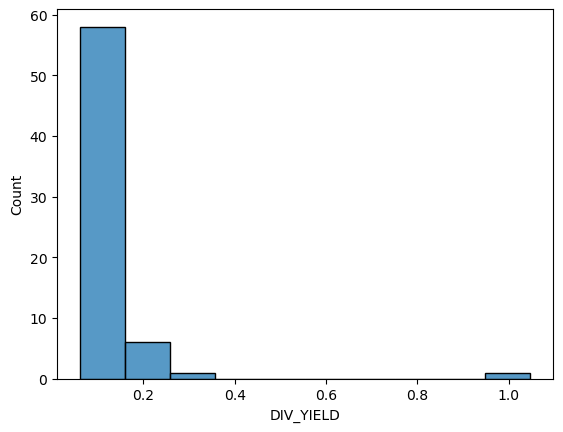

In [53]:
sns.histplot(dividend_top['DIV_YIELD'], bins=10)

In [54]:
# percentual das empresas que possuem P/L maior que 4

df_PL_company = data.query("P_L > 4")
percentual_company = (df_PL_company.shape[0]/data.shape[0])*100
print(" {:.2f}% das empreas listadas tem P/L maior que 4".format(percentual_company, 2))

df_PL_company['P_L'].describe()

 52.03% das empreas listadas tem P/L maior que 4


count     513.000000
mean       31.399084
std        96.745737
min         4.020000
25%         7.950000
50%        12.120000
75%        22.260000
max      1466.610000
Name: P_L, dtype: float64

In [55]:
# empresas com *LIQUIDEZ CORRENTE* acima de 1, TEM *ROE* acime da média das empreas e *DIVIDEND YIELD* maior ou igual a 6.

dividend_average = data['ROE'].mean()
company_top = data.query(f"ROE > {dividend_average} & DIV_YIELD >= 6")
company_top

,PAPEL,COTACAO,P_L,P_VP,PSR,DIV_YIELD,P_ATIVO,P_CAP_GIRO,P_EBIT,P_ATIV_CIRC_LIQ,EV_EBIT,EV_EBITDA,MRG_EBIT,MRG_LIQ,LIQ_CORR,ROIC,ROE,LIQ_2MESES,PATRIM_LIQ,DIV_LIQ_PATRIM,CRESC_REC_5A,DIVIDA_LIQUIDA_EBITDA,VALOR_DE_MERCADO


In [56]:
# Analisando valores do ROEs das empresas

data[['ROE', 'DIV_YIELD']]

,ROE,DIV_YIELD
0,-0.2592,0.0000
1,0.1429,0.0000
2,0.1429,0.0631
3,0.1671,0.0558
4,-0.0082,0.0000
...,...,...
981,0.1577,0.0332
982,-0.1486,0.0000
983,0.1217,0.0000
984,0.0581,0.0143


count      986.000000
mean        27.239532
std        613.701241
min       -119.207000
25%          0.000000
50%          0.089250
75%          0.201100
max      13632.000000
Name: ROE, dtype: float64


/home/maercio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ROE', ylabel='Count'>

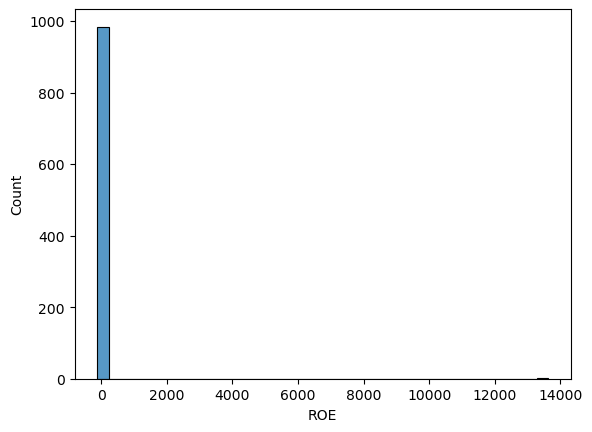

In [57]:

print(data['ROE'].describe())
sns.histplot(data['ROE'], bins=40)


In [58]:
# Análise DIVIDEND YIELD

data[['PAPEL', 'DIV_YIELD']]

,PAPEL,DIV_YIELD
0,AALR3,0.0000
1,ABCB3,0.0000
2,ABCB4,0.0631
3,ABEV3,0.0558
4,ABYA3,0.0000
...,...,...
981,WLMM4,0.0332
982,WMBY3,0.0000
983,WSON33,0.0000
984,YDUQ3,0.0143


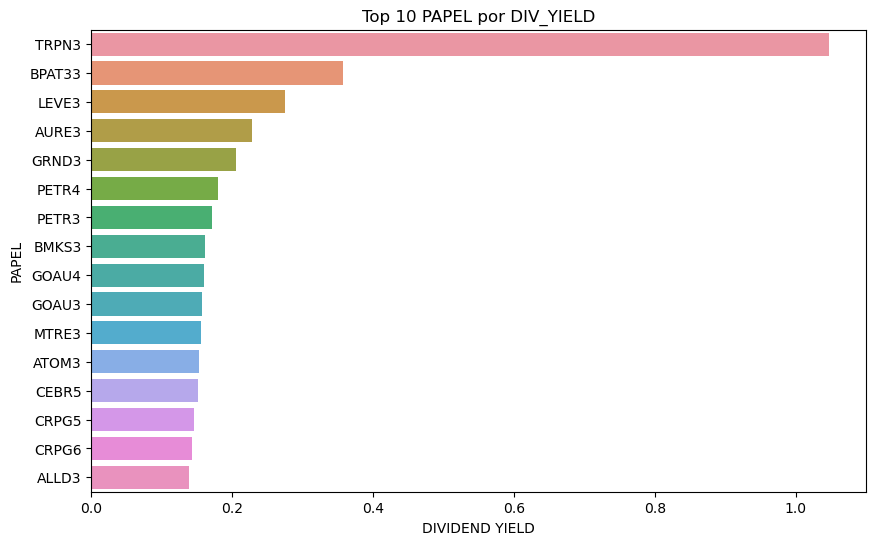

In [76]:
# Ordenando o DataFrame com base em 'DIV_YIELD' em ordem decrescente
data_sorted = data.sort_values('DIV_YIELD', ascending=False)

# Selecionando as primeiras 10 linhas
data_top10 = data_sorted.head(20)

# Criando o gráfico de barras para os 10 maiores valores de 'DIV_YIELD'
plt.figure(figsize=(10,6))
sns.barplot(x='DIV_YIELD', y='PAPEL', data=data_top10[4:])
plt.title('Top 10 PAPEL por DIV_YIELD')
plt.xlabel('DIVIDEND YIELD')
plt.ylabel('PAPEL')
plt.show()
